In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Matplotlib style
sns.set(style="whitegrid")


In [2]:
# Load the dataset
df = pd.read_csv("agriculture_equipment_rental_data_enhanced.csv")

# Display the first few rows
print(df.head())


      equipment_type            equipment_name    brand  age condition  \
0         Cultivator  Manure Spreader Model 15  Brand C   12       New   
1            Tractor          Sprayer Model 19  Brand A    1      Good   
2              Mower            Mower Model 24  Brand D    7      Good   
3            Tractor           Harrow Model 33  Brand A   12      Fair   
4  Combine Harvester          Sprayer Model 19  Brand C    7      Good   

   usage_frequency fuel_type  horsepower  maintenance_score location  \
0               49  Electric         362           0.680599    Rural   
1              288    Hybrid         307           0.466925    Rural   
2               53    Hybrid         164           0.708905    Urban   
3              127  Electric         355           0.817685    Rural   
4              141  Electric         199           0.201431    Rural   

   demand_level rental_duration_preference  fuel_efficiency technology_level  \
0      0.702393                  Long-Term

In [3]:
df.columns

Index(['equipment_type', 'equipment_name', 'brand', 'age', 'condition',
       'usage_frequency', 'fuel_type', 'horsepower', 'maintenance_score',
       'location', 'demand_level', 'rental_duration_preference',
       'fuel_efficiency', 'technology_level', 'weather_dependency',
       'seasonal_demand_multiplier', 'rental_price_per_day'],
      dtype='object')

In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Fill or drop missing values (if any)
df.fillna(df.mean(numeric_only=True), inplace=True)

Missing values:
 equipment_type                0
equipment_name                0
brand                         0
age                           0
condition                     0
usage_frequency               0
fuel_type                     0
horsepower                    0
maintenance_score             0
location                      0
demand_level                  0
rental_duration_preference    0
fuel_efficiency               0
technology_level              0
weather_dependency            0
seasonal_demand_multiplier    0
rental_price_per_day          0
dtype: int64


In [5]:
# Dictionary to store mappings for each categorical column
label_encoders = {}
mapping_dict = {}  # Store mappings for each column

# Identify categorical columns (dtype object)
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    print(f"Before encoding '{column}':\n{df[column]}\n")  # Print before encoding
    
    # Fit and transform the column
    df[column] = le.fit_transform(df[column])
    
    # Store the LabelEncoder instance and mapping dictionary for later use
    label_encoders[column] = le
    mapping_dict[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    
    print(f"After encoding '{column}':\n{df[column]}\n")  # Print after encoding
    print(f"Mapping for '{column}': {mapping_dict[column]}\n")  # Print the mapping

# Final dataframe with encoded values
print("Final encoded DataFrame:\n", df)

Before encoding 'equipment_type':
0             Cultivator
1                Tractor
2                  Mower
3                Tractor
4      Combine Harvester
             ...        
995              Tractor
996                Mower
997    Combine Harvester
998      Manure Spreader
999               Plough
Name: equipment_type, Length: 1000, dtype: object

After encoding 'equipment_type':
0      1
1      8
2      4
3      8
4      0
      ..
995    8
996    4
997    0
998    3
999    5
Name: equipment_type, Length: 1000, dtype: int32

Mapping for 'equipment_type': {'Combine Harvester': 0, 'Cultivator': 1, 'Harrow': 2, 'Manure Spreader': 3, 'Mower': 4, 'Plough': 5, 'Seed Drill': 6, 'Sprayer': 7, 'Tractor': 8}

Before encoding 'equipment_name':
0      Manure Spreader Model 15
1              Sprayer Model 19
2                Mower Model 24
3               Harrow Model 33
4              Sprayer Model 19
                 ...           
995             Sprayer Model 8
996         Seed Drill

In [6]:
#label_encoders

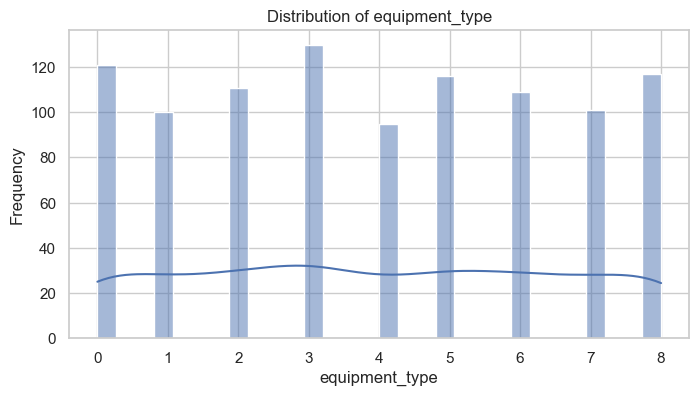

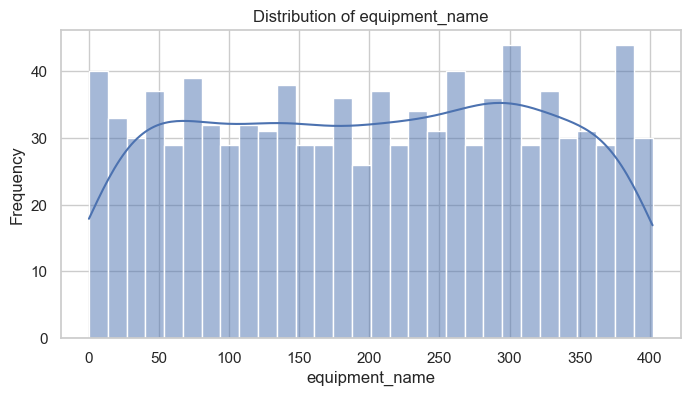

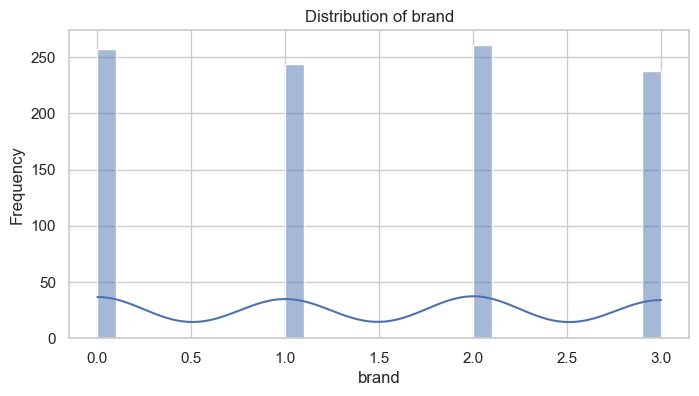

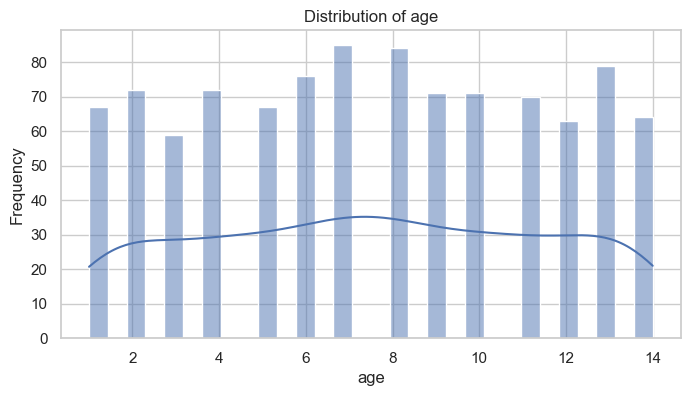

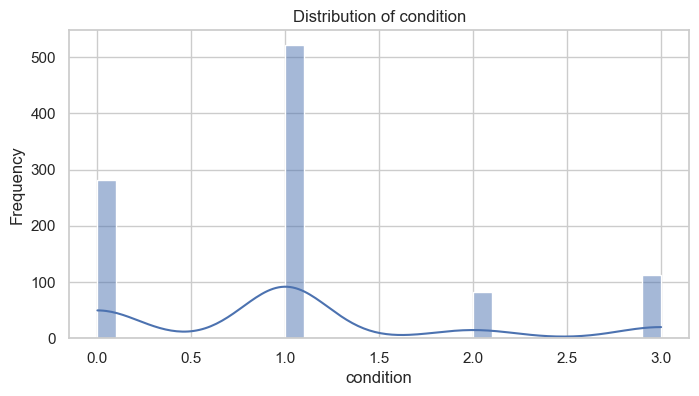

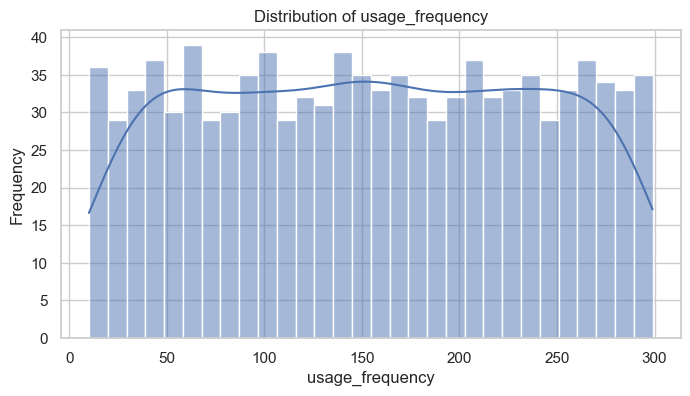

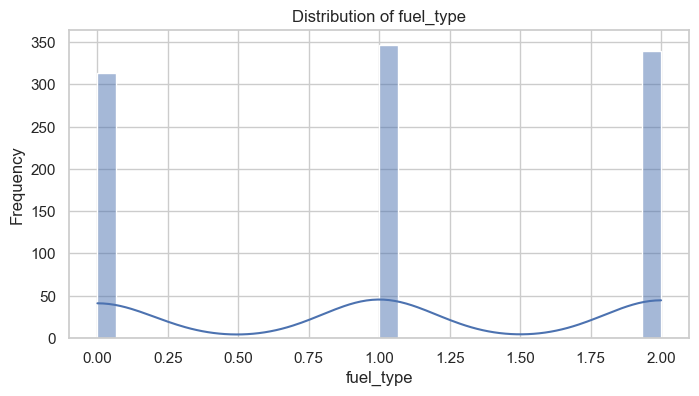

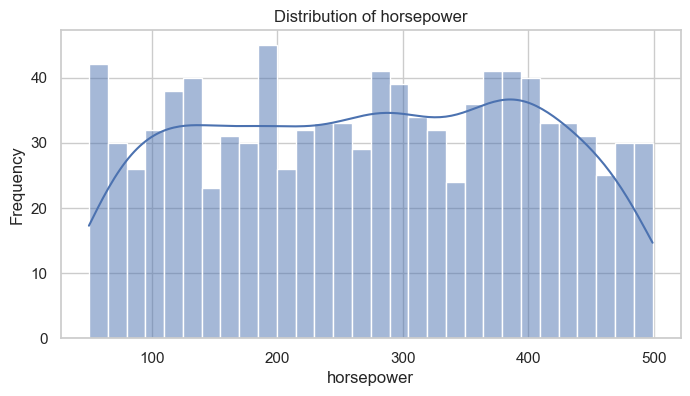

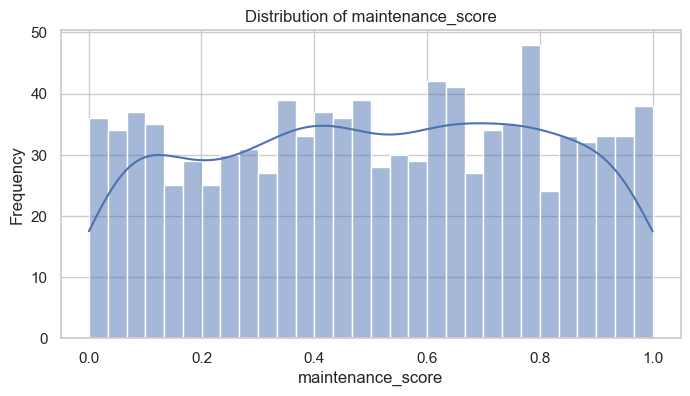

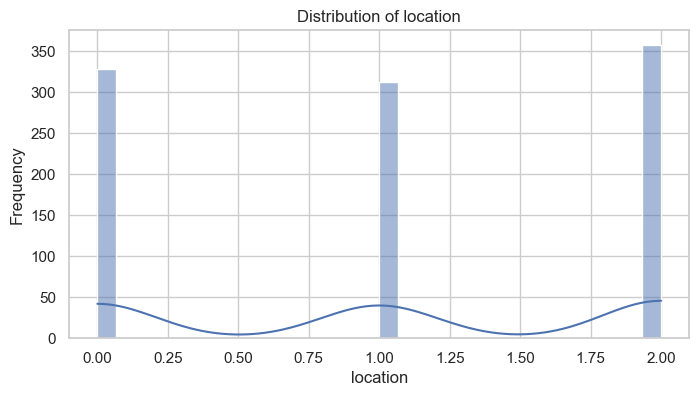

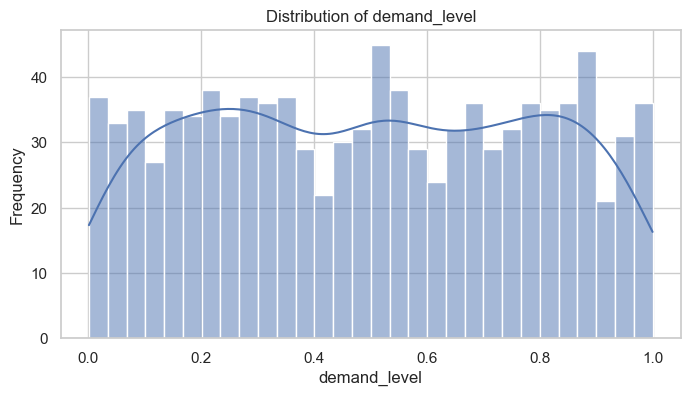

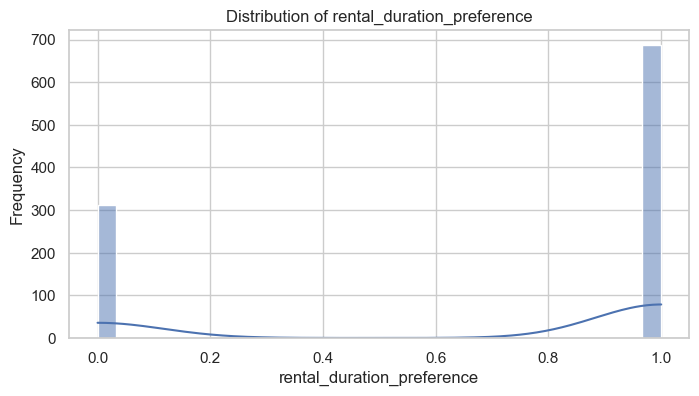

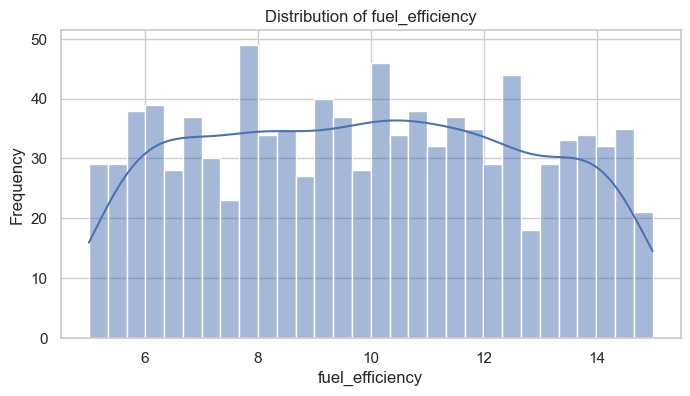

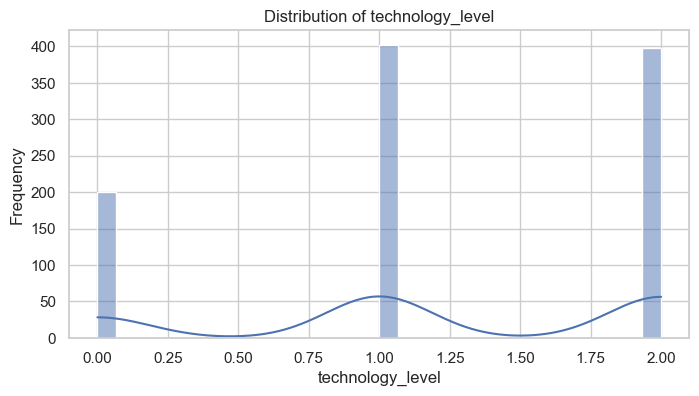

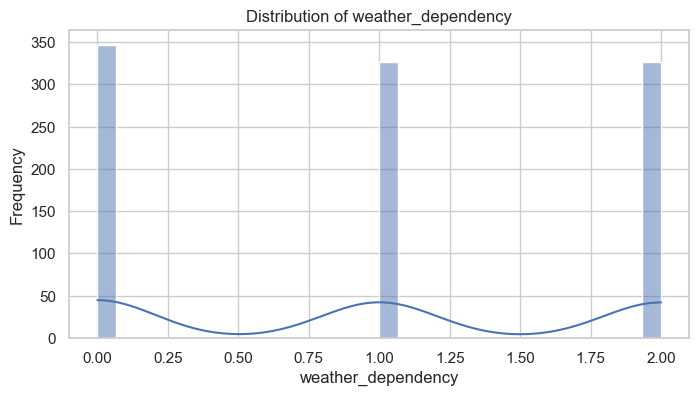

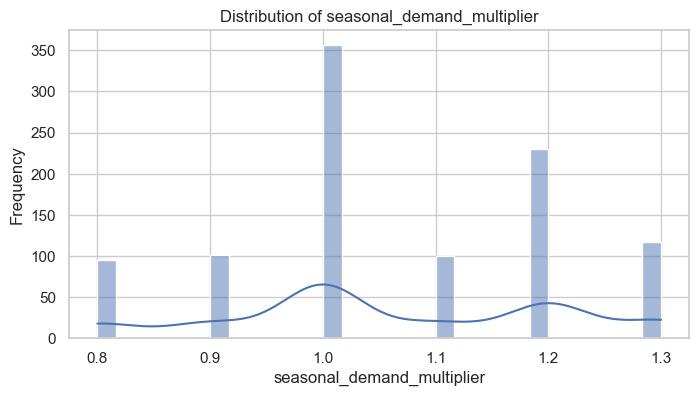

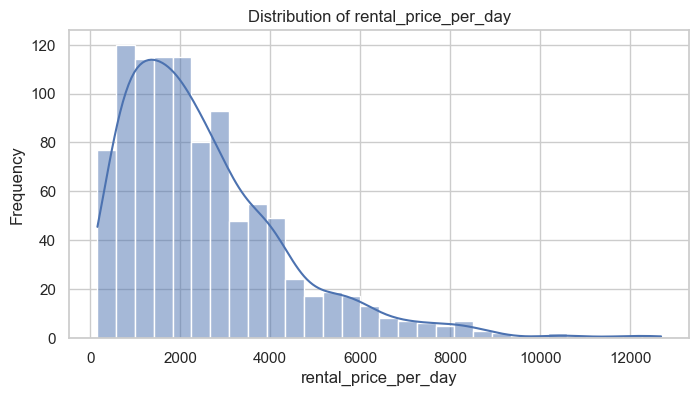

In [7]:
# Set the plot style
sns.set(style="whitegrid")

# Plot distribution of each column
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

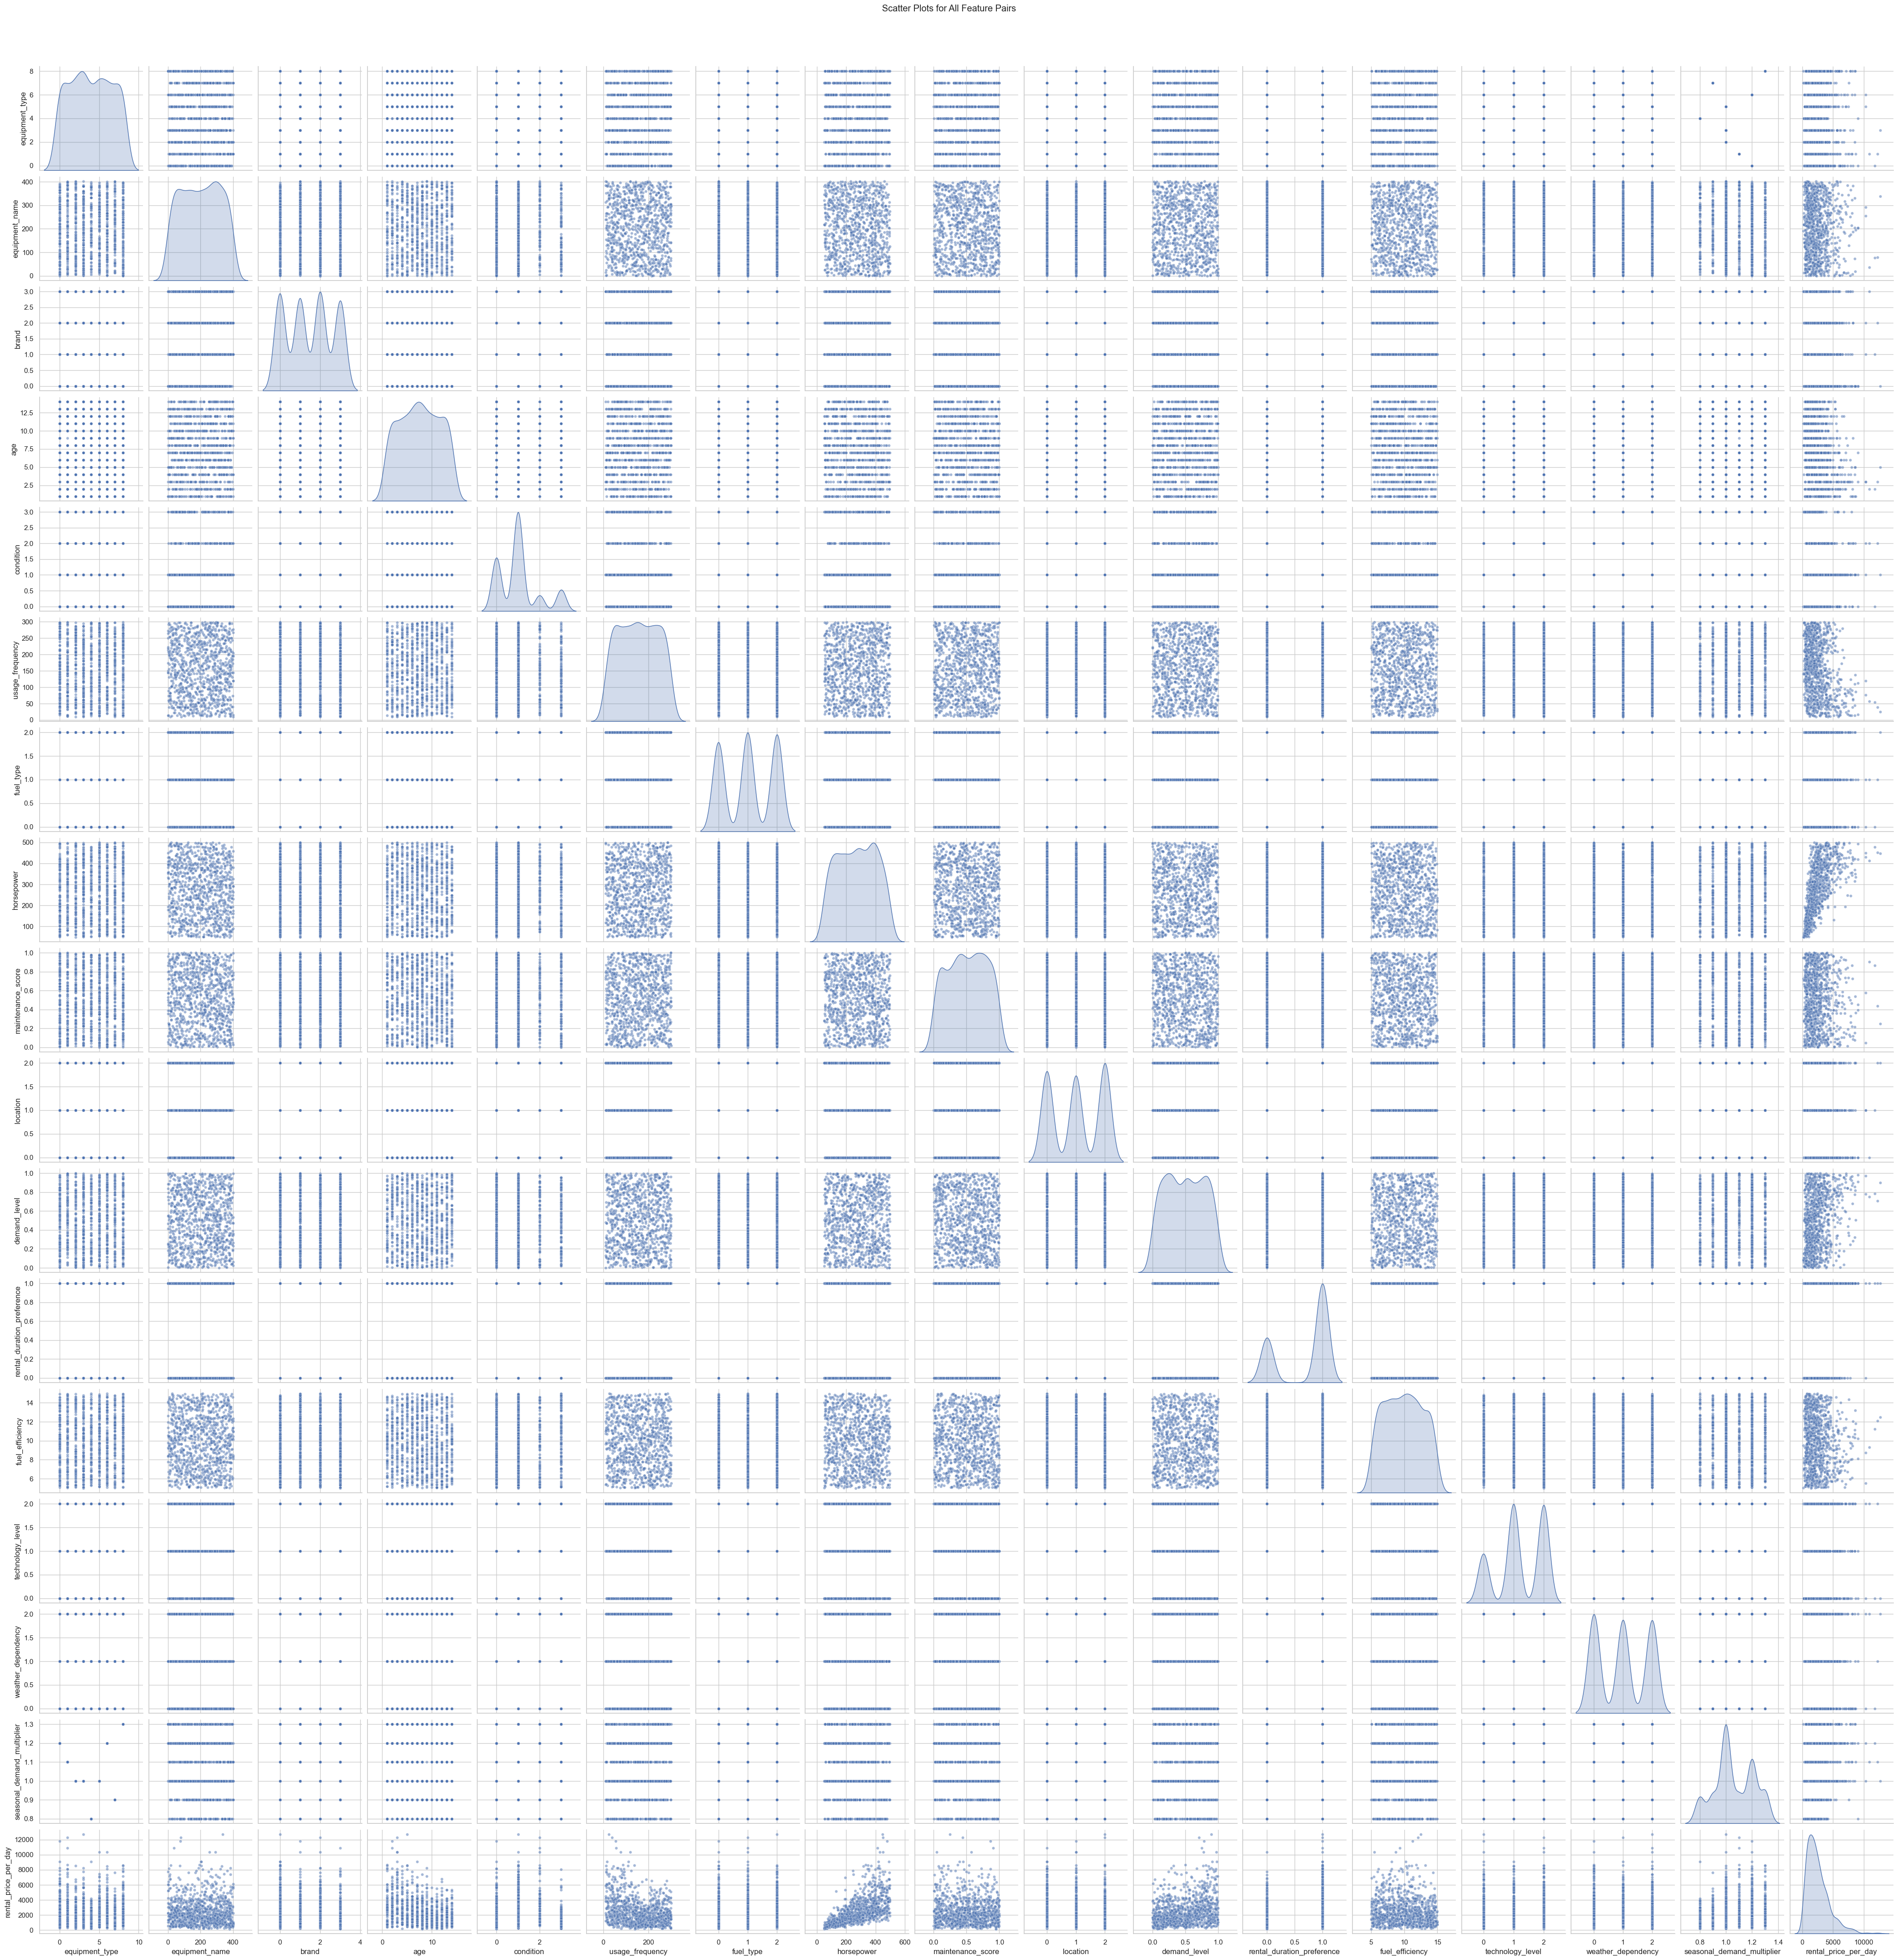

In [8]:
# Pairplot for scatter plots between all numeric columns
sns.pairplot(df, diag_kind="kde", plot_kws={'alpha':0.5, 's':20})
plt.suptitle("Scatter Plots for All Feature Pairs", y=1.02)
plt.show()

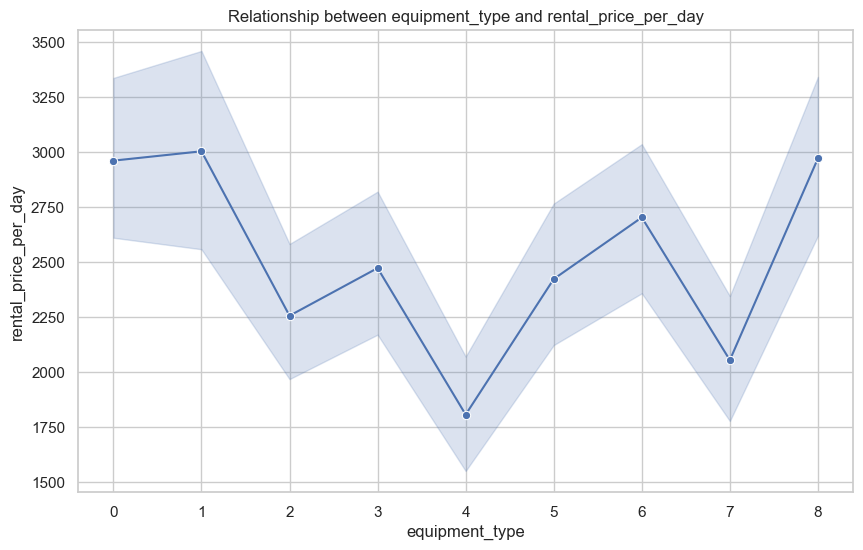

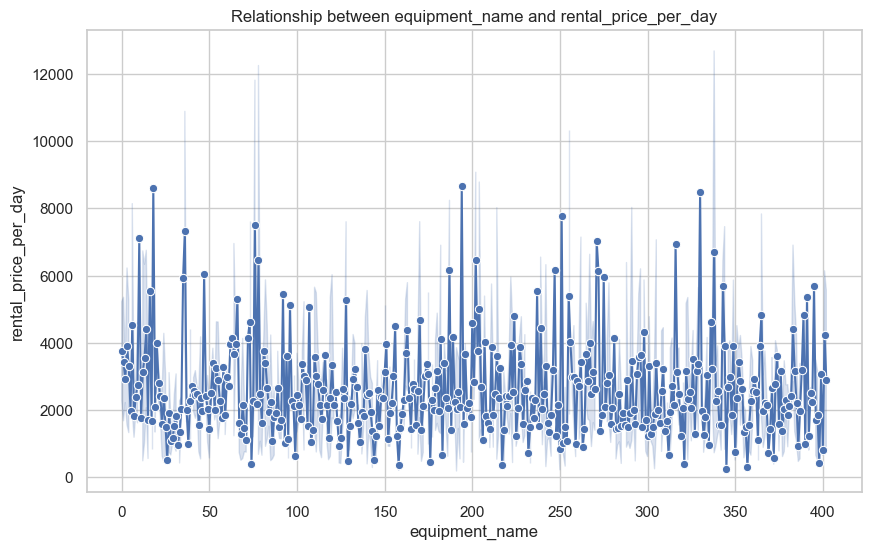

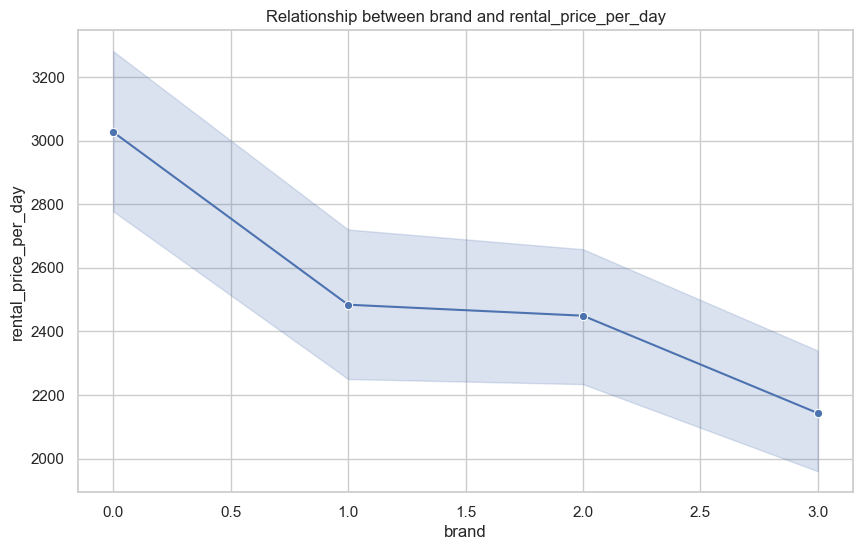

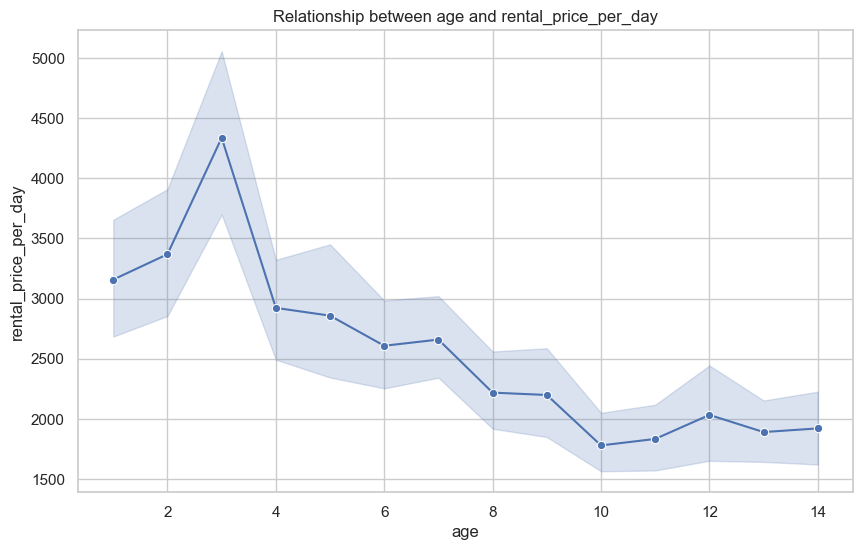

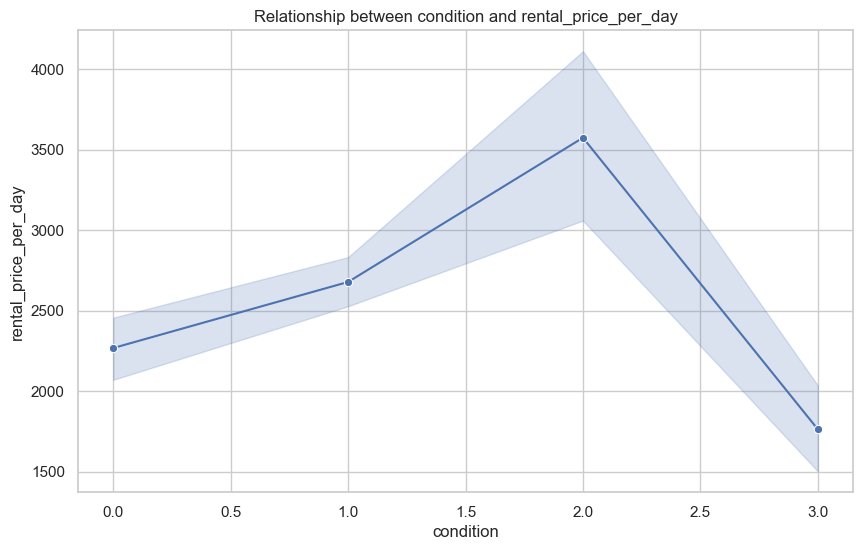

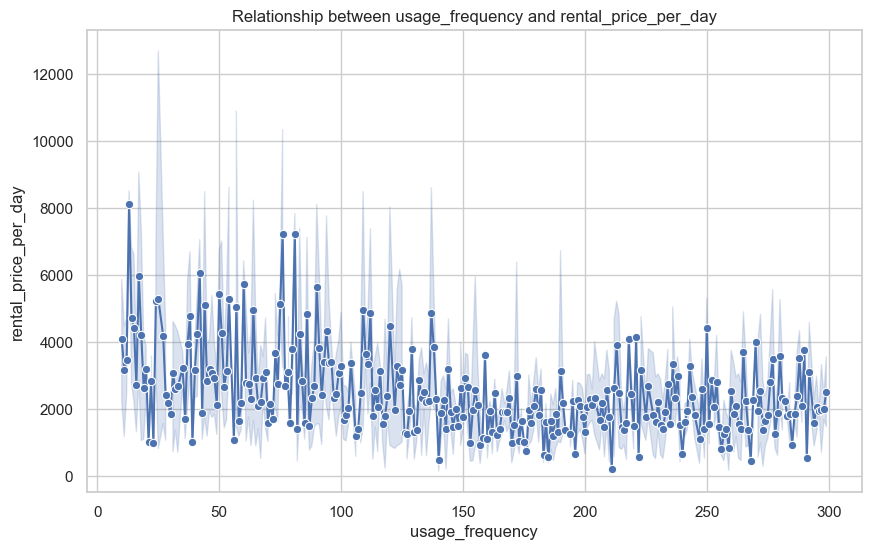

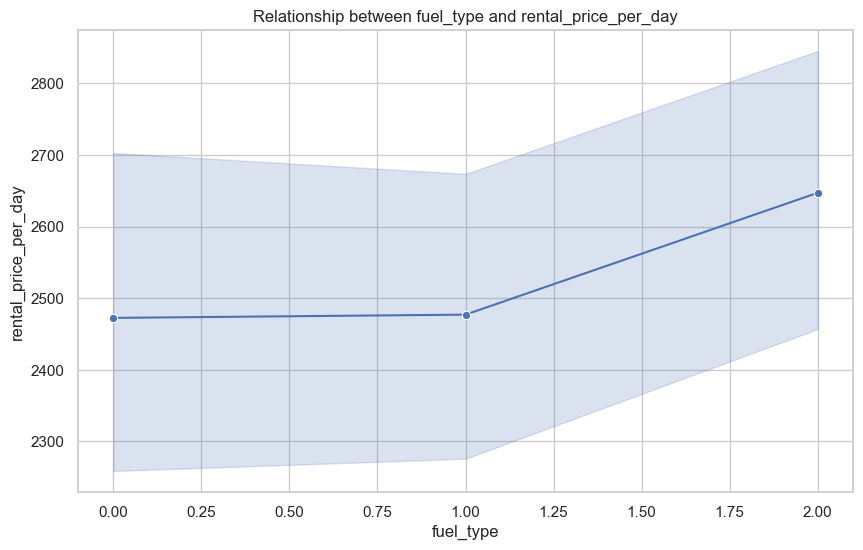

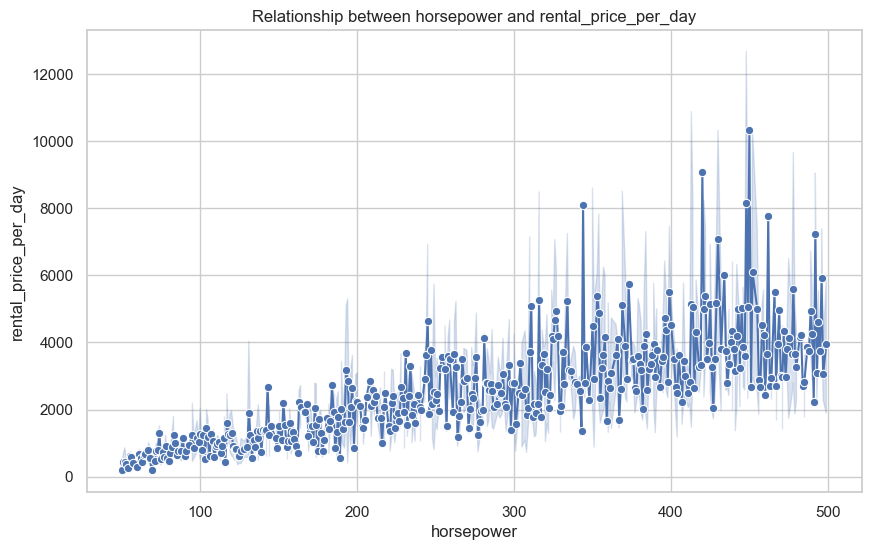

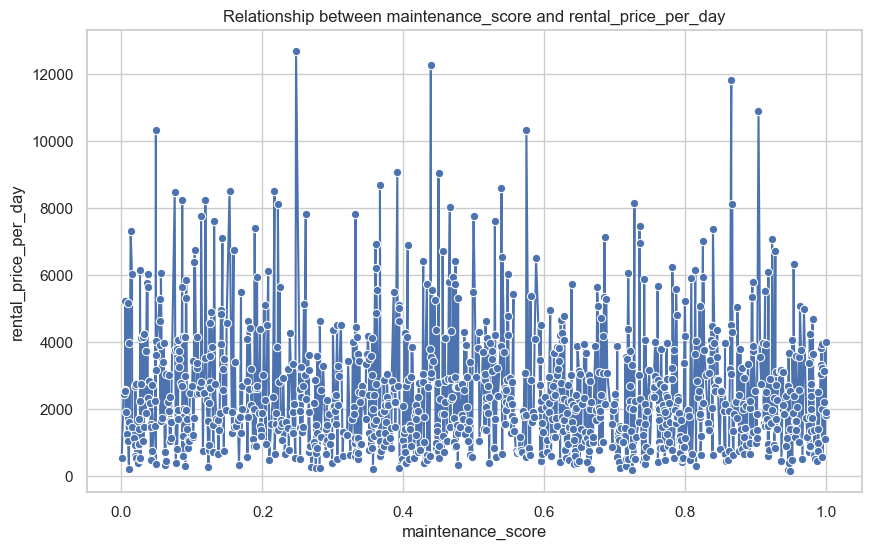

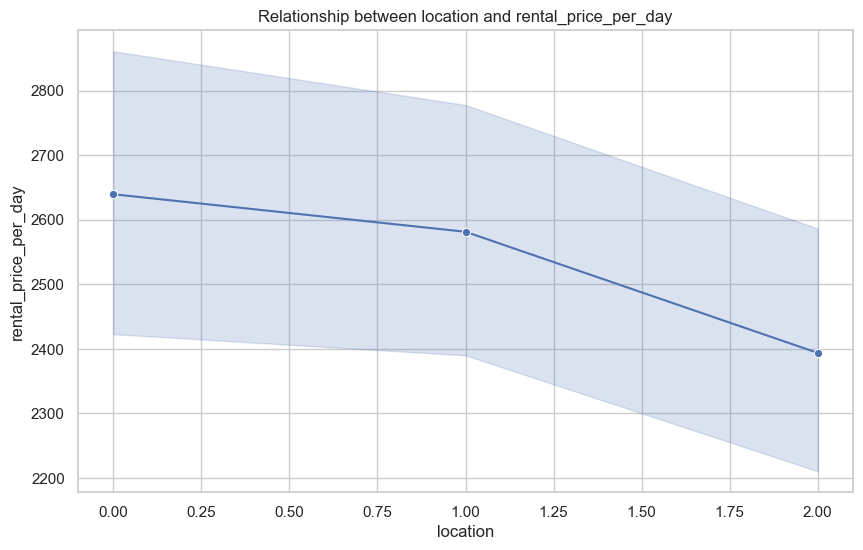

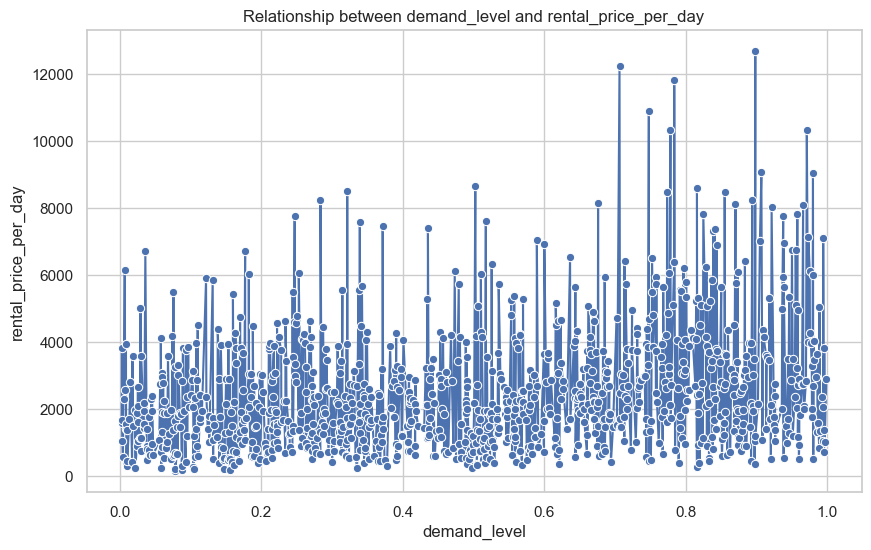

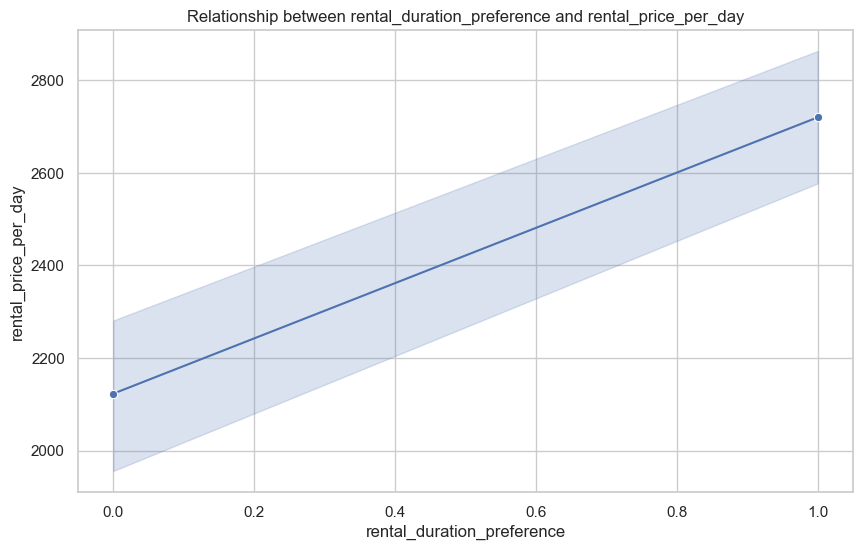

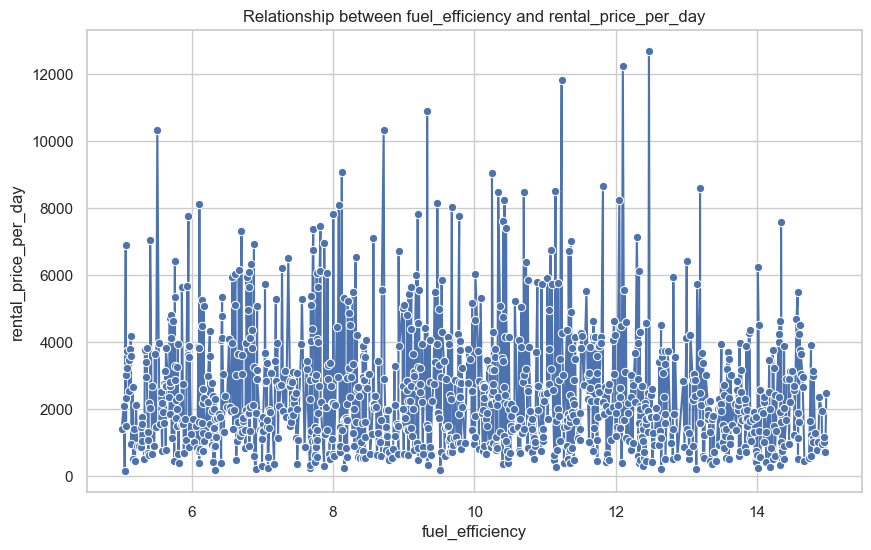

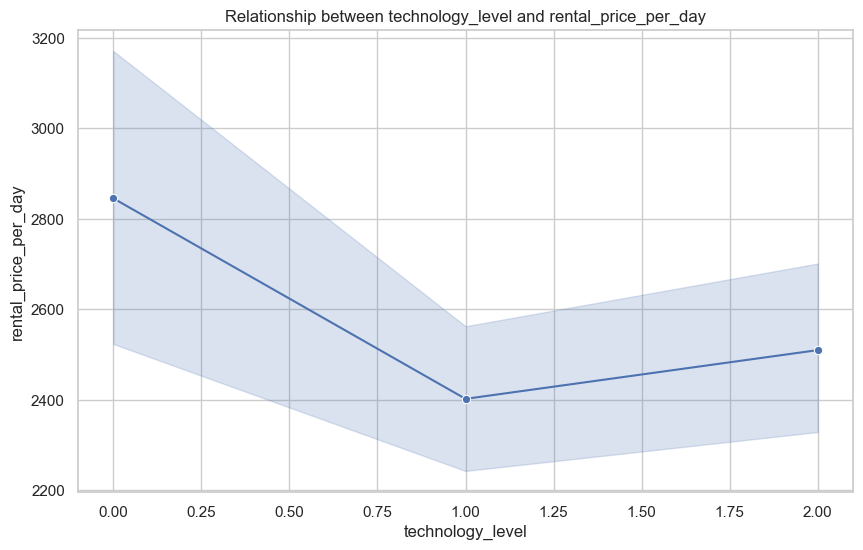

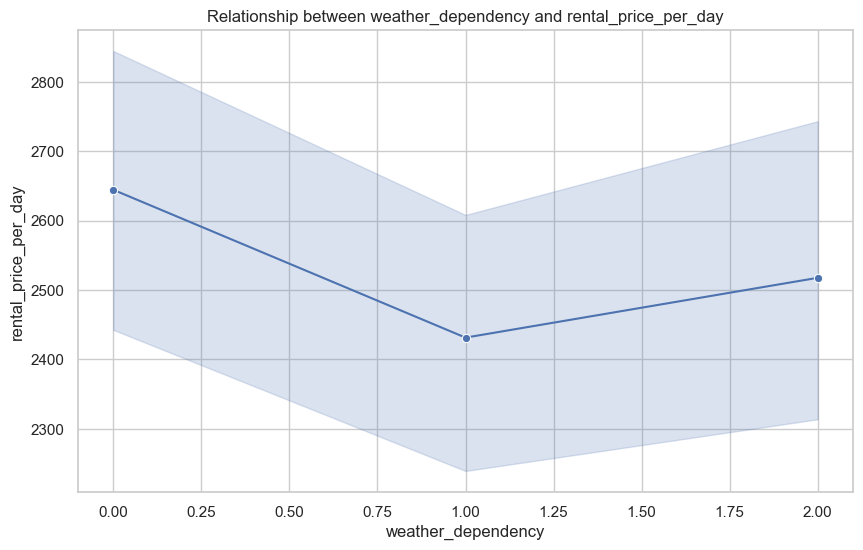

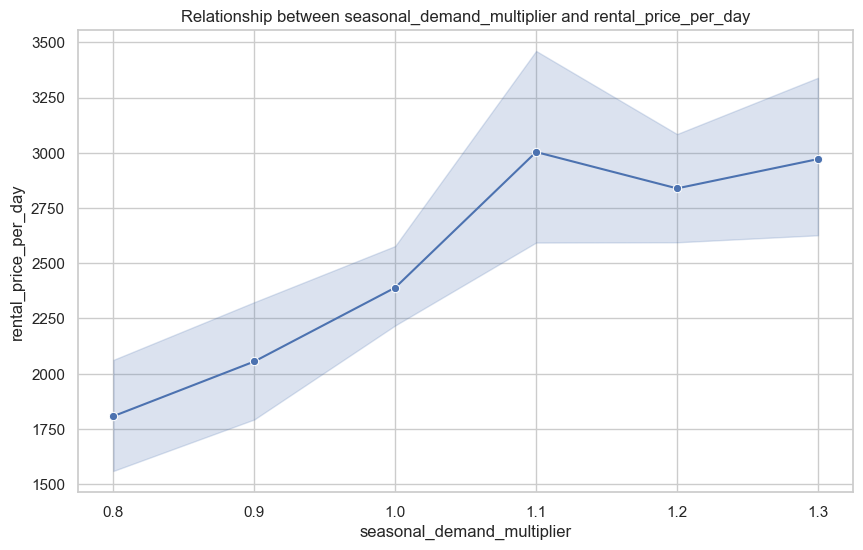

In [9]:
# Target column (output)
target_column = "rental_price_per_day"

# Set Seaborn style
sns.set(style="whitegrid")

# Generate line plots for each feature against the target column
for column in df.columns:
    if column != target_column:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df, x=column, y=target_column, marker="o")
        plt.title(f"Relationship between {column} and {target_column}")
        plt.xlabel(column)
        plt.ylabel(target_column)
        plt.show()

In [10]:

# Define features and target variable
X = df.drop(columns=["rental_price_per_day"])  # All columns except the target
y = df["rental_price_per_day"]

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [11]:
df.columns

Index(['equipment_type', 'equipment_name', 'brand', 'age', 'condition',
       'usage_frequency', 'fuel_type', 'horsepower', 'maintenance_score',
       'location', 'demand_level', 'rental_duration_preference',
       'fuel_efficiency', 'technology_level', 'weather_dependency',
       'seasonal_demand_multiplier', 'rental_price_per_day'],
      dtype='object')

In [12]:
df.head()

equipment_type  equipment_name  brand  age  condition  usage_frequency  \
0               1             139      2   12          2               49   
1               8             326      0    1          1              288   
2               4             192      3    7          1               53   
3               8             112      0   12          0              127   
4               0             326      2    7          1              141   

   fuel_type  horsepower  maintenance_score  location  demand_level  \
0          1         362           0.680599         0      0.702393   
1          2         307           0.466925         0      0.646359   
2          2         164           0.708905         2      0.519086   
3          1         355           0.817685         0      0.355585   
4          1         199           0.201431         0      0.882707   

   rental_duration_preference  fuel_efficiency  technology_level  \
0                           0         5.690136                 2   
1                           0         6.258240                 1   
2                           1         9.586062                 1   
3                           0         5.680097                 2   
4                           1         6.624146                 2   

   weather_dependency  seasonal_demand_multiplier  rental_price_per_day  
0                   1                         1.1               4733.26  
1                   0                         1.3               4347.57  
2                   2                         0.8               1447.03  
3                   0                         1.3               2369.19  
4                   1                         1.2               3032.60

In [13]:
df.columns

Index(['equipment_type', 'equipment_name', 'brand', 'age', 'condition',
       'usage_frequency', 'fuel_type', 'horsepower', 'maintenance_score',
       'location', 'demand_level', 'rental_duration_preference',
       'fuel_efficiency', 'technology_level', 'weather_dependency',
       'seasonal_demand_multiplier', 'rental_price_per_day'],
      dtype='object')

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and metrics for Linear Regression
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression - MAE:", mae_lr, "RMSE:", rmse_lr, "R²:", r2_lr)


Linear Regression - MAE: 665.5940499062501 RMSE: 908.557791391008 R²: 0.7725241686547704


In [16]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and metrics for Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - MAE:", mae_rf, "RMSE:", rmse_rf, "R²:", r2_rf)


Random Forest - MAE: 634.498459 RMSE: 862.6026295309124 R²: 0.7949538108481877


In [17]:
# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predictions and metrics for SVR
y_pred_svr = svr_model.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR - MAE:", mae_svr, "RMSE:", rmse_svr, "R²:", r2_svr)


SVR - MAE: 1402.9780106300518 RMSE: 2011.9303322518595 R²: -0.11546519321010118


In [18]:
# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and metrics for XGBoost Regressor
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost - MAE:", mae_xgb, "RMSE:", rmse_xgb, "R²:", r2_xgb)


XGBoost - MAE: 486.53236098022455 RMSE: 710.8312537689309 R²: 0.8607602688855722


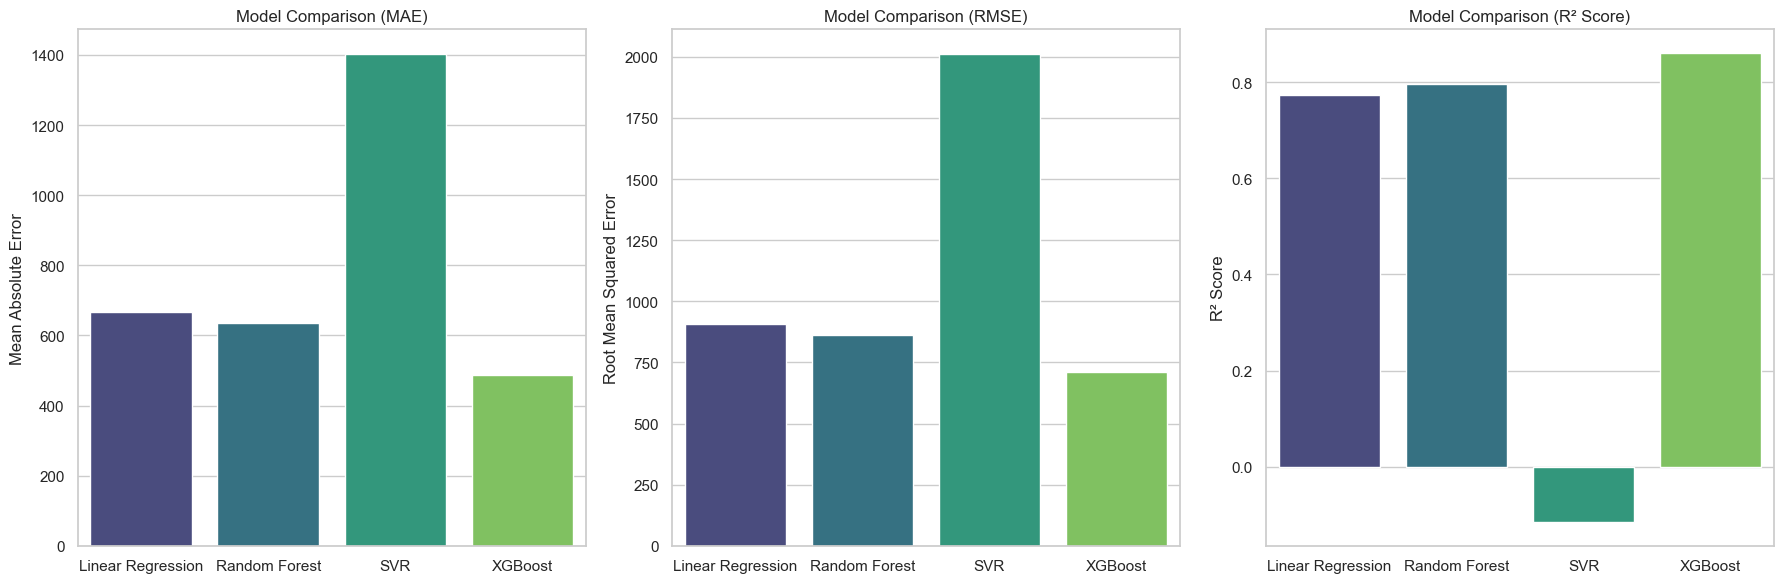

In [19]:
# Prepare data for visualization
models = ["Linear Regression", "Random Forest", "SVR", "XGBoost"]
mae_scores = [mae_lr, mae_rf, mae_svr, mae_xgb]
rmse_scores = [rmse_lr, rmse_rf, rmse_svr, rmse_xgb]
r2_scores = [r2_lr, r2_rf, r2_svr, r2_xgb]

# Plotting MAE, RMSE, and R² for each model
plt.figure(figsize=(18, 6))

# MAE Plot
plt.subplot(1, 3, 1)
sns.barplot(x=models, y=mae_scores, palette="viridis")
plt.title("Model Comparison (MAE)")
plt.ylabel("Mean Absolute Error")

# RMSE Plot
plt.subplot(1, 3, 2)
sns.barplot(x=models, y=rmse_scores, palette="viridis")
plt.title("Model Comparison (RMSE)")
plt.ylabel("Root Mean Squared Error")

# R² Plot
plt.subplot(1, 3, 3)
sns.barplot(x=models, y=r2_scores, palette="viridis")
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")

plt.tight_layout()
plt.show()


In [20]:
import pickle

# Save the trained model to a pickle file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

print("Model saved successfully!")

Model saved successfully!


In [21]:
# Load the saved model
with open('xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [22]:
import numpy as np

# Example input: A single list of 16 random numbers
random_input = np.random.rand(1, 16)  # Adjust to the correct number of features if needed

# Make a prediction using the loaded model
prediction = loaded_model.predict(random_input)
print("Prediction for the random input:", prediction)


Prediction for the random input: [2231.3108]
